In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

### Первичный анализ

In [28]:
df_heart = pd.read_csv('data/heart.csv')
df_heart.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [29]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. Данные состоят из 303 наблюдений (строк) и 14 переменных (столбцов).
2. Все переменные, кроме 'oldpeak', имеют целочисленный тип данных (int64), что указывает на то, что они могут представлять собой категориальные или дискретные значения.
3. Переменная 'oldpeak' имеет тип float64, что означает, что она содержит непрерывные числовые значения.
4. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (303).
5. Переменная 'target' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.  
6. Переменные 'cp', 'restecg', 'slope', 'ca' и 'thal' представляют собой категориальные переменные, так как имеют целочисленный тип данных.

### Статистические характеристики признаков

Для анализа и интерпретации необходимо преобразовать 9 столбцов (cp, fbs, restecg, slope, sex, ca, thal, exang и target) из числовых в строковый тип данных, несмотря на их числовую природу. Такой вывод основан на рассмотрении типов данных и объяснений функций, представленных ранее.

In [30]:
# Непрерывные признаки
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Признаки объектного типа
features_to_convert = [feature for feature in df_heart.columns if feature not in  continuous_features]

df_heart[features_to_convert] = df_heart[features_to_convert].astype('object')

df_heart.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [31]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


На основе представленных статистических данных можно сделать следующие заключения:

1. Возраст (age): Средний возраст пациентов равен приблизительно 54 годам. Самому младшему пациенту 29 лет, а самому старшему – 77. Половина пациентов находится в возрастной группе от 47,5 до 61 года (интерквартильный размах).

2. Артериальное давление (trestbps): Средний показатель артериального давления составляет около 132 мм рт. ст. Минимальное значение – 94 мм рт. ст., максимальное – 200 мм рт. ст. У половины пациентов артериальное давление лежит в диапазоне от 120 до 140 мм рт. ст.

3. Холестерин (chol): Уровень холестерина в среднем составляет около 246 мг/дл. Минимальное значение – 126 мг/дл, максимальное – 564 мг/дл. Половина пациентов имеет уровень холестерина в пределах от 211 до 274,5 мг/дл.

4. Максимальная частота сердечных сокращений (thalach): Средняя максимальная частота сердечных сокращений составляет около 150 ударов в минуту. Минимальное значение – 71 удар в минуту, максимальное – 202. Половина пациентов имеет частоту сердечных сокращений в диапазоне от 133,5 до 166 ударов в минуту.

5. Депрессия сегмента ST (oldpeak): Средний уровень депрессии сегмента ST составляет приблизительно 1,04. Минимальное значение – 0, максимальное – 6,2. У половины пациентов этот показатель находится в пределах от 0 до 1.

In [32]:
df_heart.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


Анализ категориальных переменных:

1. Пол (sex): В данных присутствуют два уникальных значения, наиболее частое значение - 1 (мужской пол), которое встречается 207 раз.

2. Тип боли в груди (cp): Есть четыре уникальных типа боли в груди, наиболее распространенный тип - 0, который встречается 143 раза.

3. Уровень сахара в крови натощак (fbs): Присутствуют два уникальных значения, наиболее частое значение - 0 (уровень сахара ниже порогового значения), которое встречается 258 раз.

4. Результаты ЭКГ в покое (restecg): Есть три уникальных результата, наиболее распространенный результат - 1, который встречается 152 раза.

5. Наличие стенокардии (exang): Присутствуют два уникальных значения, наиболее частое значение - 0 (отсутствие стенокардии), которое встречается 204 раза.

6. Наклон сегмента ST (slope): Есть три уникальных типа наклона, наиболее распространенный тип - 2, который встречается 142 раза.

7. Количество крупных сосудов (ca): Присутствуют пять уникальных значений, наиболее частое значение - 0 (отсутствие крупных сосудов), которое встречается 175 раз.

8. Талассемия (thal): Есть четыре уникальных типа талассемии, наиболее распространенный тип - 2, который встречается 166 раз.

9. Целевая переменная (target): Присутствуют два уникальных значения, наиболее частое значение - 1, которое встречается 165 раз.

### Одномерный анализ числовых переменных

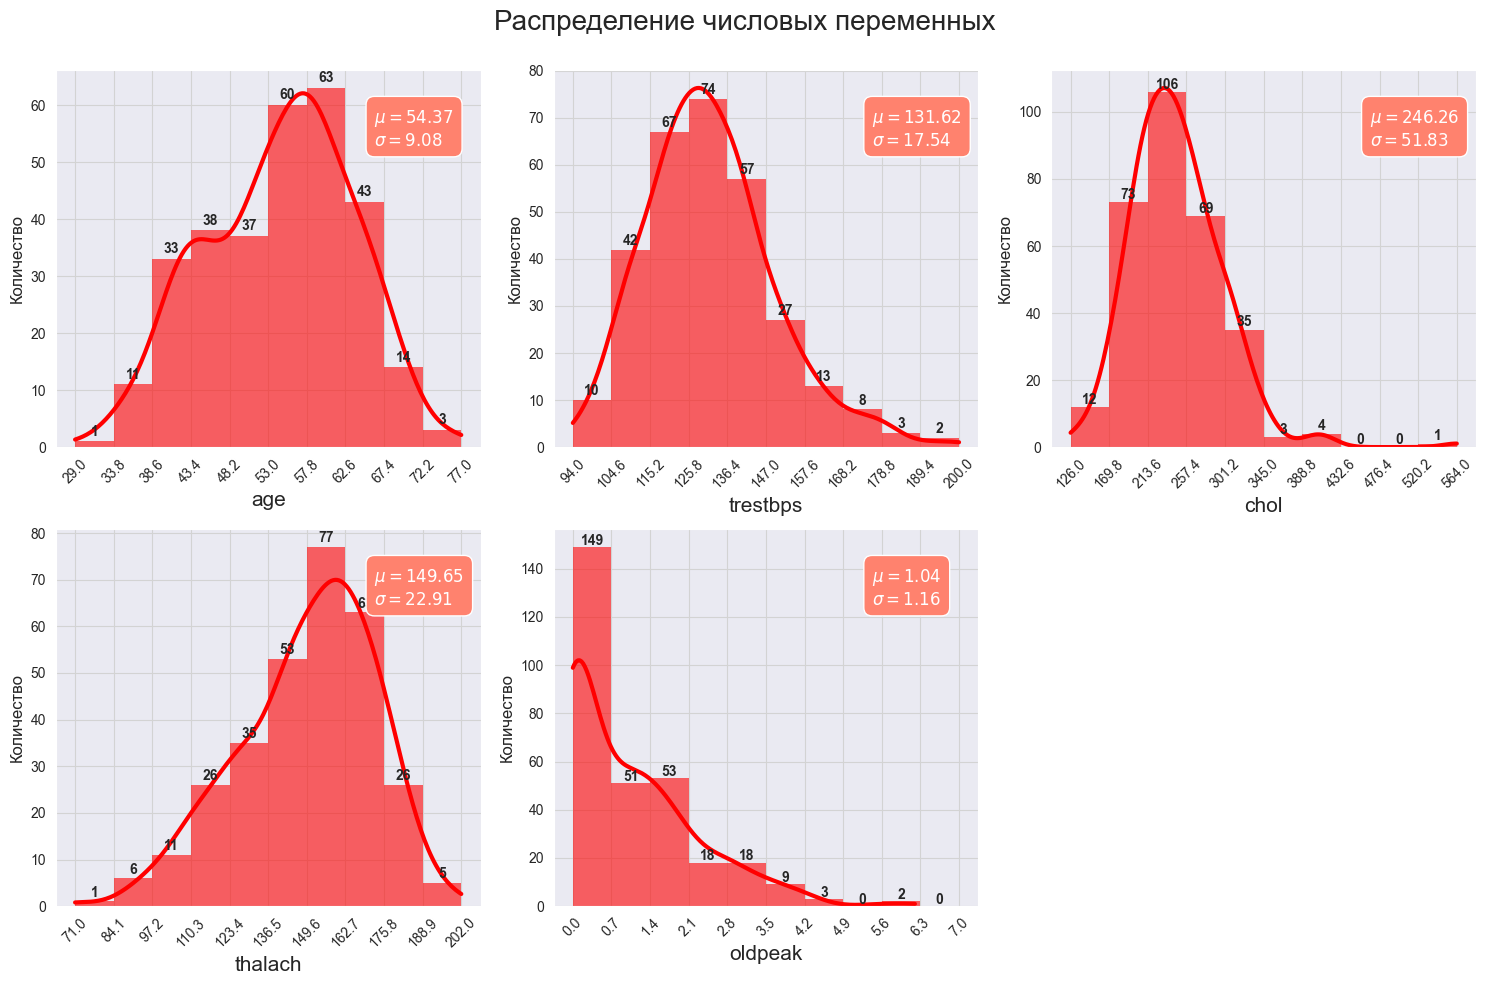

In [33]:
df_continuous = df_heart[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

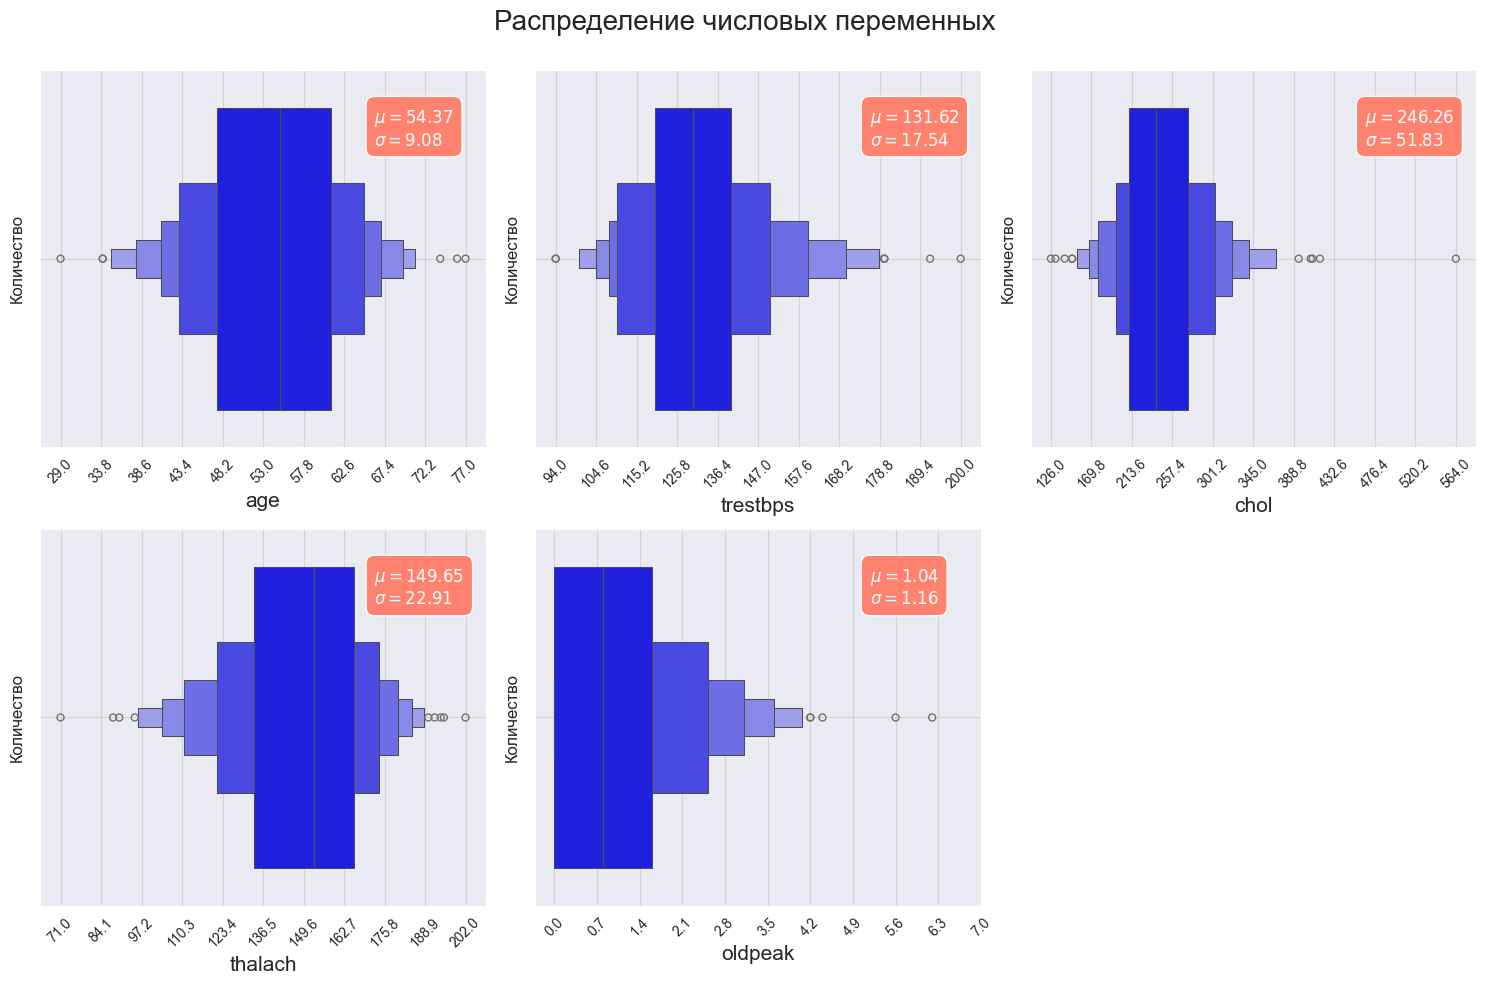

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

1. Первый график слева вверху показывает распределение переменной "age" (возраст). Среднее значение возраста µ = 54.37 лет, стандартное отклонение σ = 9.08 лет. Распределение относительно симметричное, с легким смещением влево, что указывает на небольшое количество молодых участников.

2. Второй график сверху посередине отображает распределение переменной "trestbps" ( кровяное давление в состоянии покоя). Среднее значение составляет µ = 131.62, а стандартное отклонение — σ = 17.54. Это распределение также симметричное, соответствующее нормальному распределению.

3. Третья диаграмма в верхнем правом углу представляет переменную "chol" (холестерин). Среднее значение уровня холестерина составляет µ = 246.26, стандартное отклонение — σ = 51.83. Распределение имеет правостороннюю асимметрию, с некоторым увеличением в области высоких значений.

4. График нижний левый показывает переменную "thalach" (максимальная частота сердцебиений). Здесь среднее µ = 149.65, стандартное отклонение σ = 22.91. Распределение немного скошено влево, что указывает на меньшее количество людей с высокой максимальной частотой сердцебиений.

5. Нижний правый график иллюстрирует переменную "oldpeak", которая, вероятно, связана с уровнем депрессии сегмента ST на ЭКГ после нагрузки. Среднее значение составляет µ = 1.04, стандартное отклонение — σ = 1.16. Распределение oldpeak является сильно асимметричным с длинным правым хвостом, что указывает на значительное количество низких значений и сравнительно малое количество высоких значений.

### Одномерный анализ категориальных признаков

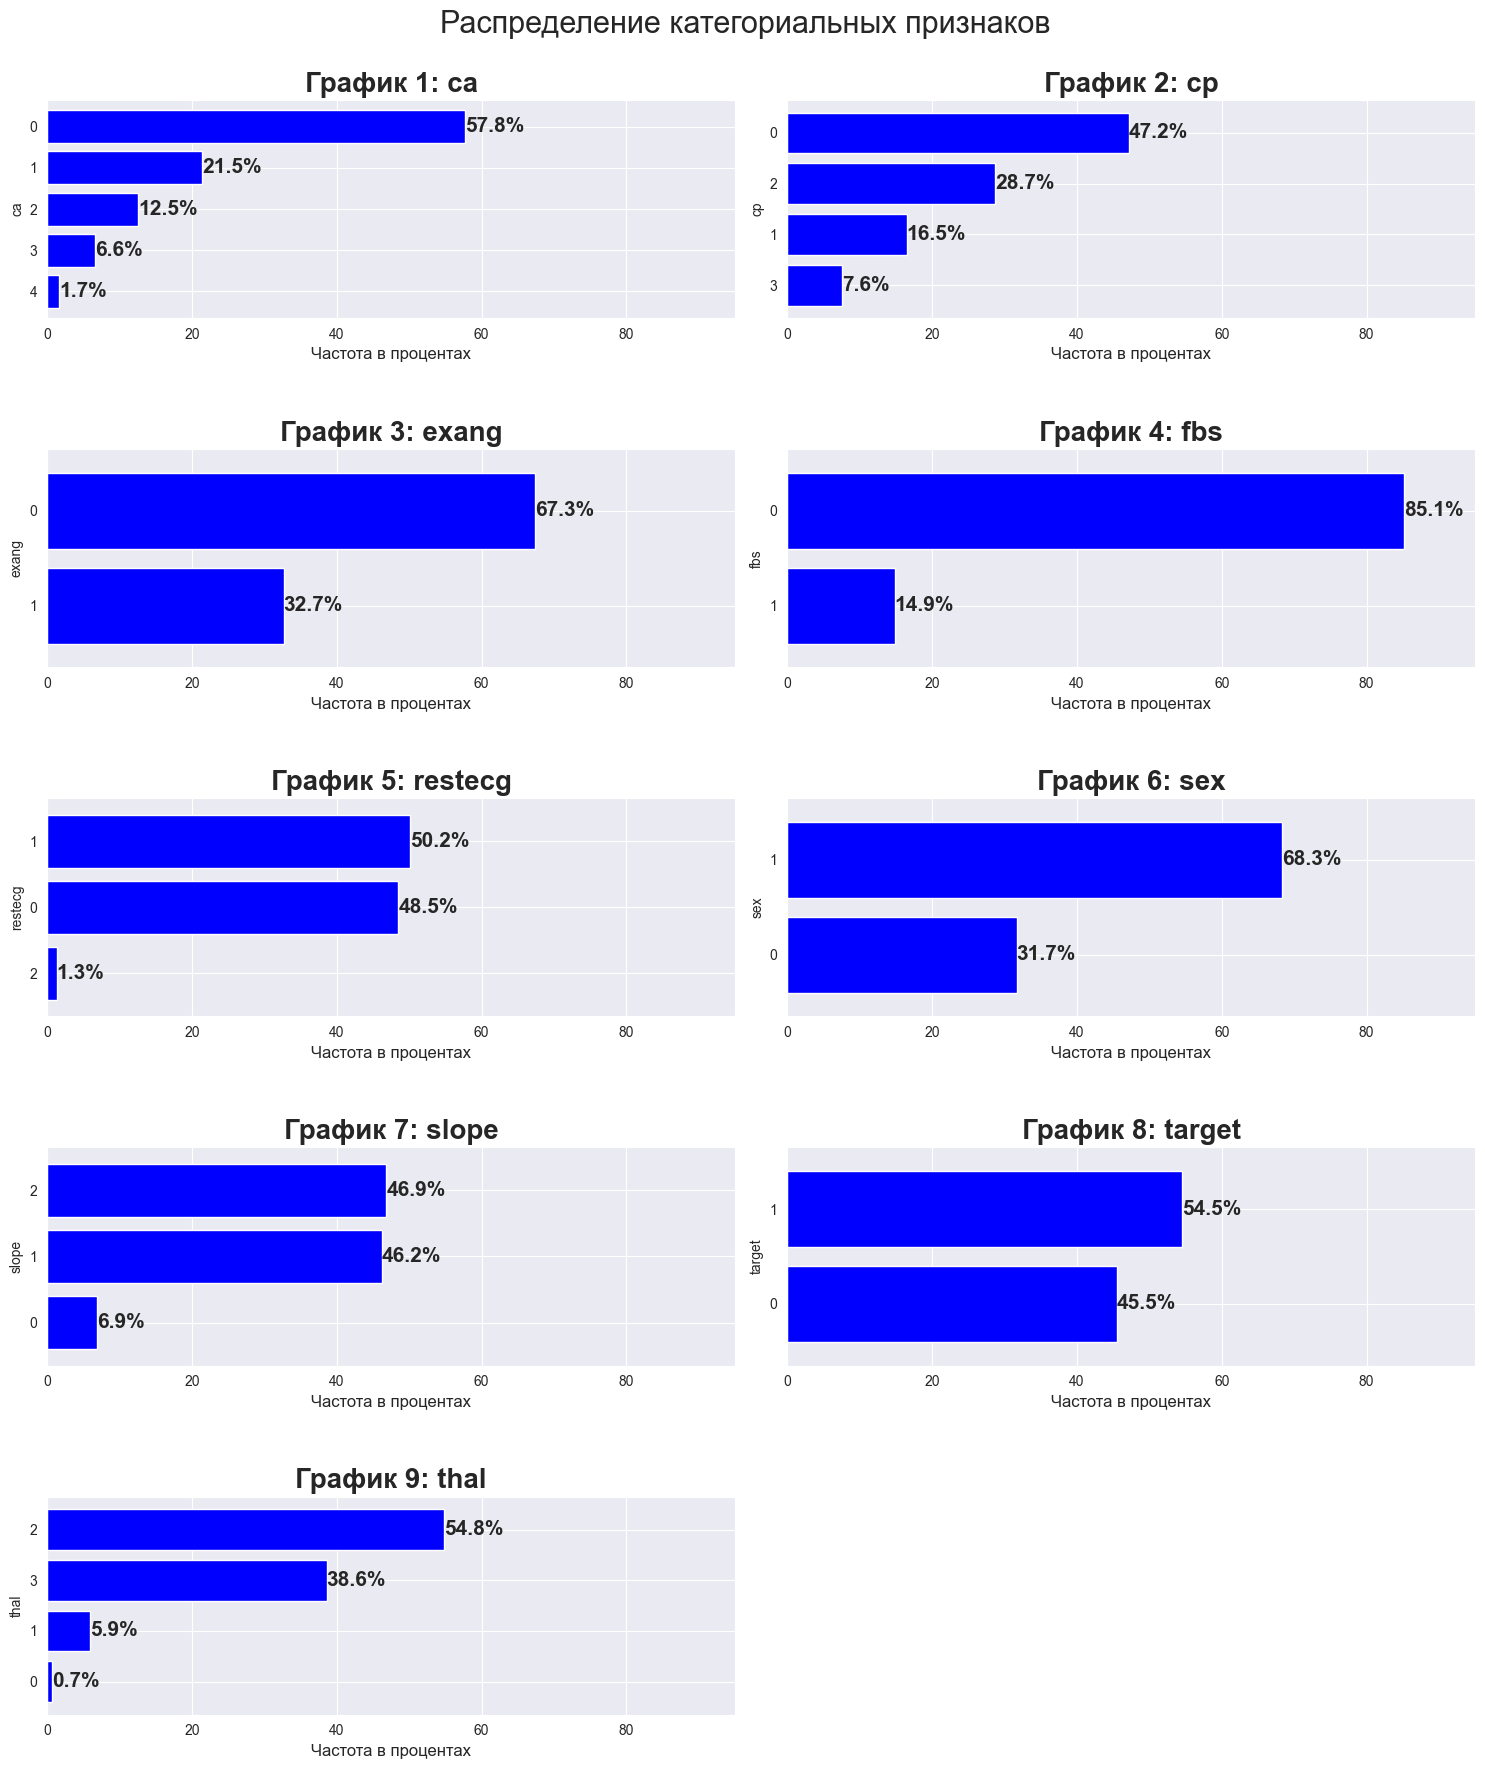

In [35]:
categorical_features = df_heart.columns.difference(continuous_features)
df_categorical = df_heart[categorical_features]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Цикл для построения столбчатых диаграмм для каждого категориального объекта в макете 5x2
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Вычисление процентных значений частоты
    value_counts = df_heart[col].value_counts(normalize=True).mul(100).sort_values()

    # Построение столбчатой диаграммы
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='blue')

    # Добавим процентные значения частоты к столбцам
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%',
                              fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Частота в процентах', fontsize=12)
    ax[row, col_idx].set_title(f'График {i+1}: {col}', fontsize=20, weight='bold')

# Отключение последнего пустого графика
ax[4,1].axis('off')

plt.suptitle('Распределение категориальных признаков', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.6)
plt.show()

- График 1 `ca`: категория "0" встречается в 57,8% случаев, "1" — в 21,5%, "2" — в 12,5%, "3" — в 6,6% и "4" — в 1,7% случаев.
- График 2 `cp`: тип "0" составляет 47,2%, "1" — 28,7%, "2" — 16,5%, и "3" — 7,6%.
- График 3 `exang`: "0" встречается в 67,3% случаев, и "1" — в 32,7%.
- График 4 `fbs`: "0" составляет 85,1%, и "1" — 14,9%.
- График 5 `restecg`: категория "0" — 50,2%, "1" — 48,5%, и "2" — 1,3%.
- График 6 `sex`: "0" соответствует 31,7% и "1" — 68,3%.
- График 7 `slope`: категория "2" встречается в 46,9% случаев, "1" — в 46,2%, и "0" — в 6,9%.
- График 8 `target`: категория "1" составляет 54,5% и "0" — 45,5%.
- График 9 `thal`: "2" составляет 54,8%, "3" — 38,6%, "1" — в 5,9%, и "0" — 0,7%.
